<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment04/20154652DJLee_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [2]:
# import data with numpy
data = np.genfromtxt('dataset.txt', delimiter=',')[:,:]

# data = np.loadtxt('dataset.txt', delimiter=',')
print(data.shape)
print(data[0])
data[0,0] = 34.62365962451697
print(data[0])
# number of training data
n = data.shape[0]
print('Number of training data=',n)

(100, 3)
[        nan 78.02469282  0.        ]
[34.62365962 78.02469282  0.        ]
Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

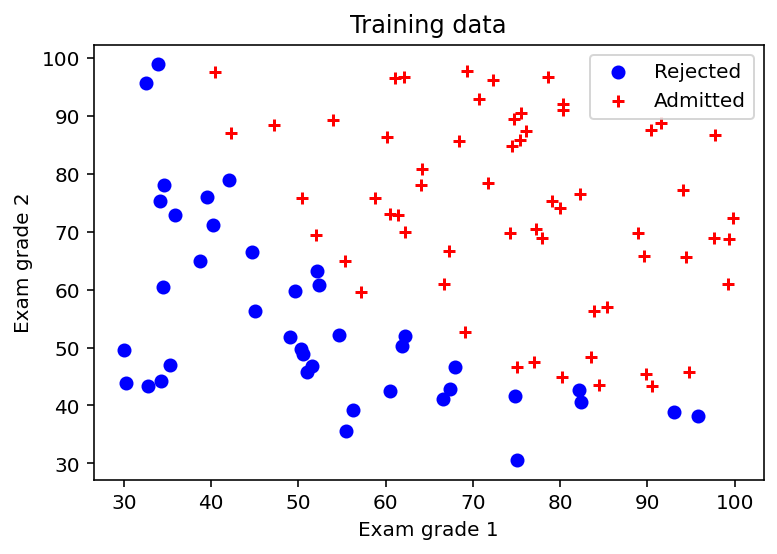

In [3]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(1)
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.show()

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

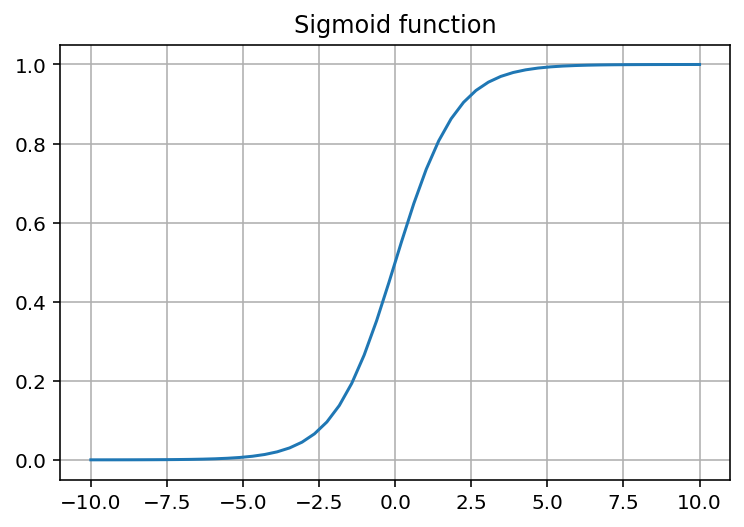

In [4]:
def sigmoid(z):
    
    sigmoid_f = 1 / (1+np.exp(-z))
    
    return sigmoid_f 


# plot
x_values = np.linspace(-10,10)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [5]:
# construct the data matrix X
n = data.shape[0]
X = np.ones([n, 3])
X[:,0] = 1
X[:,1] = x1
X[:,2] = x2

# parameters vector
w = np.array([-10,0.1,-0.2])[:,None]

# predictive function definition
def f_pred(X,w): 
    
    p = sigmoid(np.dot(X,w))
    
    return p

y_pred = f_pred(X,w)

## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [6]:
def mse_loss(h_arr, label):  # mean square error 
    diff = h_arr - label
    return np.dot(diff.T, diff) / len(label)

def ce_loss(h_arr, label):  # cross-entropy error
    
    return (np.dot(-label.T, np.log(h_arr)) - np.dot((1-label).T, np.log(1-h_arr))) / len(label)
y = data[:,2][:,None] # label 

print(y_pred.shape)
print(y.shape)
print(mse_loss(y_pred, y))
print(ce_loss(y_pred, y))

(100, 1)
(100, 1)
[[0.59999465]]
[[10.39164415]]


## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [7]:
# loss function definition
def grad_mse(y_pred,y, X): 
    n = len(y)
    tmp = np.multiply((y_pred - y), y_pred)
    tmp2 = np.multiply(tmp, (1-y_pred))
    grad = (np.dot(X.T, tmp2)*2) / n
    
    return grad

# loss function definition
def grad_ce(y_pred,y, X): 
    n = len(y)
    grad = np.dot(X.T, (y_pred - y)*2) / n
    
    return grad

# Test loss function 
y = data[:,2][:,None] # label 
y_pred = f_pred(X,w) # prediction
mse_grad = grad_mse(y_pred,y, X)
ce_grad = grad_ce(y_pred,y, X)

## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


[[-24.99980984]
 [  0.21990297]
 [  0.19059453]]
[[-22.00773164]
 [  0.18102095]
 [  0.17594616]]


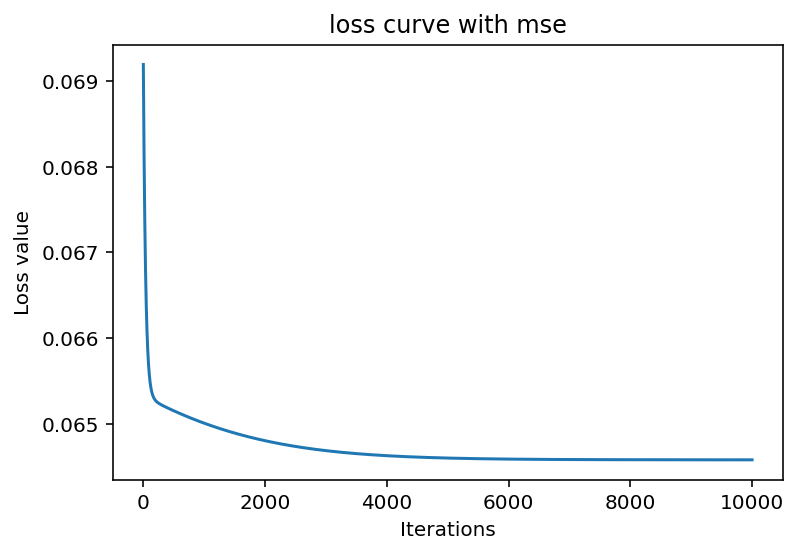

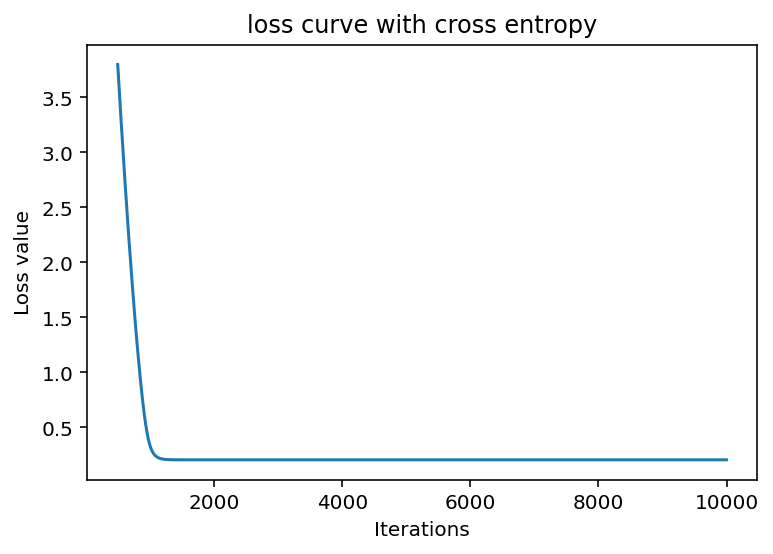

In [8]:
# gradient descent function definition
def grad_desc_mse(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,3]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function 
        grad_f = grad_mse(y_pred,y,X) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = mse_loss(y_pred,y) # save the current loss value 
        w_iters[i,:] = w.reshape(1, len(w)) # save the current w value 
        
    return w, L_iters, w_iters

# gradient descent function definition
def grad_desc_ce(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,3]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function  
        grad_f = grad_ce(y_pred,y,X) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = ce_loss(y_pred,y) # save the current loss value 
        w_iters[i,:] = w.reshape(1, len(w)) # save the current w value 
        
    return w, L_iters, w_iters

# run gradient descent algorithm
start = time.time()
w_init_mse = np.array([-25,0.2,0.2])[:,None]
w_init_ce = np.array([-22,-1,1])[:,None]
tau = 1e-4
max_iter = 10000
w_mse, L_iters_mse, w_iters_mse = grad_desc_mse(X,y,w_init_mse,tau,max_iter)
w_ce, L_iters_ce, w_iters_ce = grad_desc_ce(X,y,w_init_ce,tau,max_iter)
print(w_mse)
print(w_ce)
# plot
plt.figure(3)
plt.plot(L_iters_mse)
plt.title('loss curve with mse')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

plt.figure(4)
plt.plot(L_iters_ce)
plt.title('loss curve with cross entropy')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

[[ 1.         30.05882245 30.60326323]
 [ 1.         31.48268031 30.60326323]
 [ 1.         32.90653818 30.60326323]
 ...
 [ 1.         96.98014207 98.86943574]
 [ 1.         98.40399993 98.86943574]
 [ 1.         99.8278578  98.86943574]]
(2500, 3)
(3, 1)
3.5202643769061113e-06
0.9999998620819698


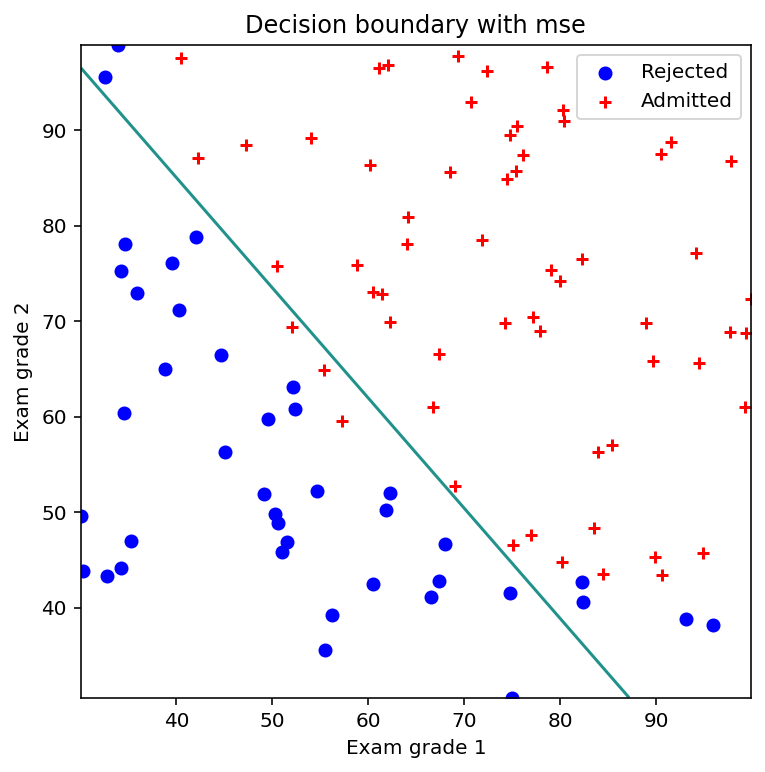

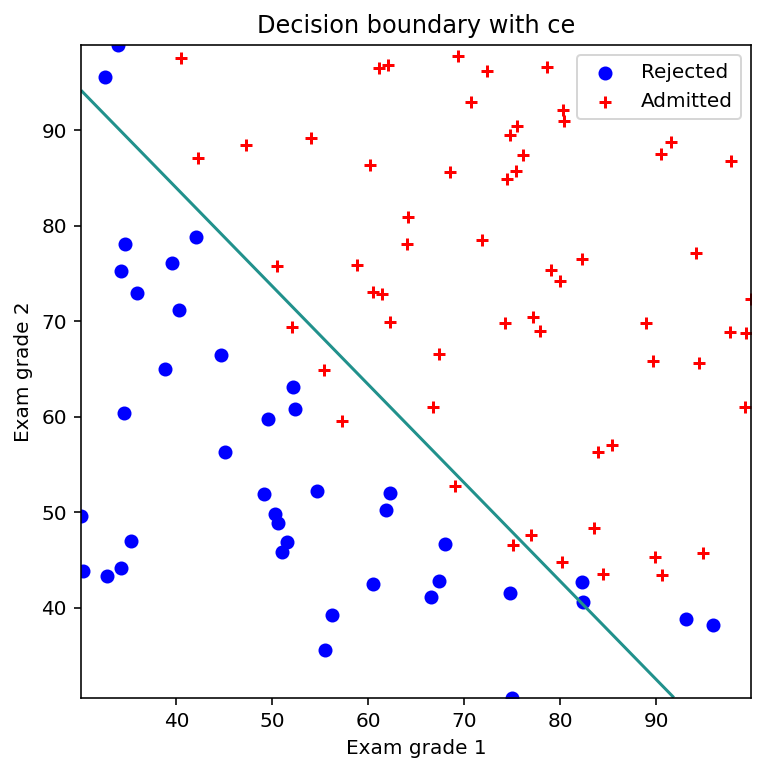

In [9]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,0] = 1
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

p_mse = f_pred(X2, w_mse)
p_mse = p_mse.reshape(xx1.shape)
p_ce = f_pred(X2, w_ce)
p_ce = p_ce.reshape(xx1.shape[0], xx2.shape[0])

# plot
plt.figure(5,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.contour(xx1, xx2, p_mse, levels=1)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.title('Decision boundary with mse')
plt.show()

plt.figure(6,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.contour(xx1, xx2, p_ce, levels=1)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.title('Decision boundary with ce')
plt.show()

## 9. Comparison with Scikit-learn logistic regression algorithm with the gradient descent with the cross-entropy loss
<hr>

You may use scikit-learn function `LogisticRegression(C=1e6)`.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-25.05219314]
 [  0.20535491]
 [  0.2005838 ]]


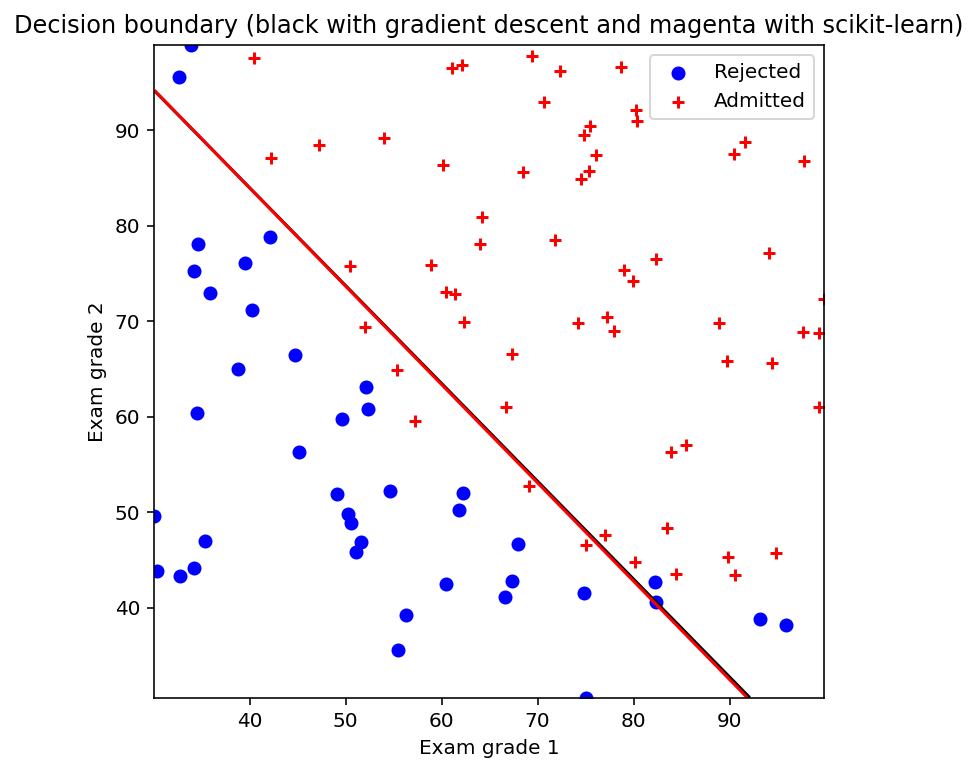

In [14]:
# run logistic regression with scikit-learn
start = time.time()
x_train = data[:,:2]
y = data[:,2][:,None]
logreg_sklearn = LogisticRegression()# scikit-learn logistic regression
logreg_sklearn.fit(x_train, y) # learn the model parameters 
# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_[0]
# loss_sklearn = ce_loss()

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

p = f_pred(X2, w_sklearn)
p = p.reshape(50,50)
plt.contour(xx1, xx2, p, levels=1, colors='black' );
plt.contour(xx1, xx2, p_ce, levels=1, colors='red');

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend(loc=1)
plt.show()


## 10. Plot the probability map
<hr>

In [11]:
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid( )

Z = np.zeros( )

for i in range(len(score_x1)): 
    for j in range(len(score_x2)):
        
            predict_prob = sigmoid( )

            Z[j, i] = predict_prob
            
            # actual plotting example
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.tick_params( )
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf( )
ax.scatter( ) 
ax.scatter( ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()

plt.legend()
plt.show()

ValueError: ignored

# Output results

## 1. Plot the dataset in 2D cartesian coordinate system (1pt)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.show()

## 2. Plot the sigmoid function (1pt)

In [ ]:
plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 3. Plot the loss curve in the course of gradient descent using the mean square error (2pt)

In [ ]:
plt.figure(3)
plt.plot(L_iters_mse)
plt.title('loss curve with mse')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the loss curve in the course of gradient descent using the cross-entropy error (2pt)

In [ ]:
plt.figure(4)
plt.plot(L_iters_ce)
plt.title('loss curve with cross entropy')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 5. Plot the decision boundary using the mean square error (2pt)

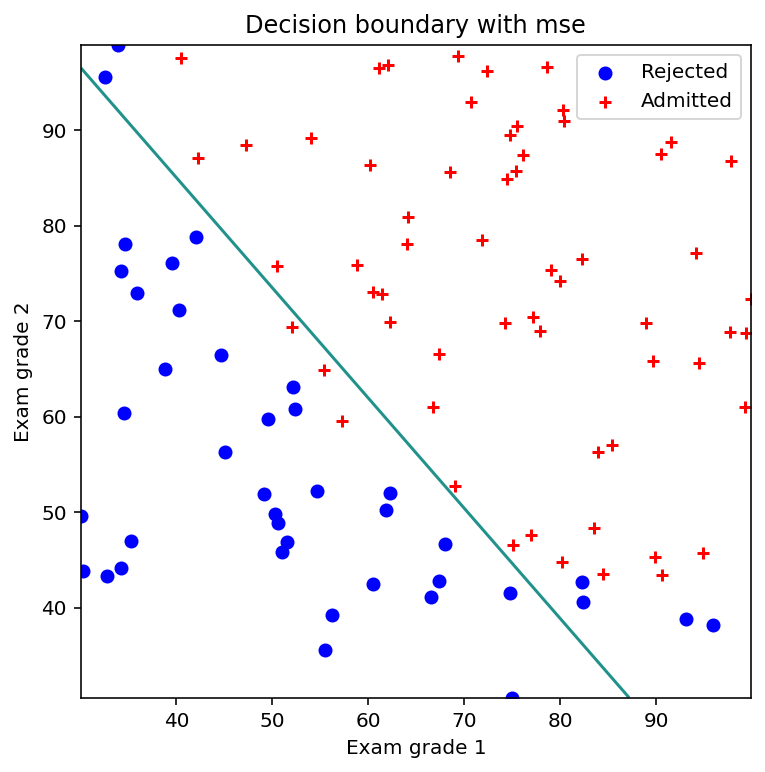

In [12]:
plt.figure(5,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.contour(xx1, xx2, p_mse, levels=1)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.title('Decision boundary with mse')
plt.show()

## 6. Plot the decision boundary using the cross-entropy error (2pt)

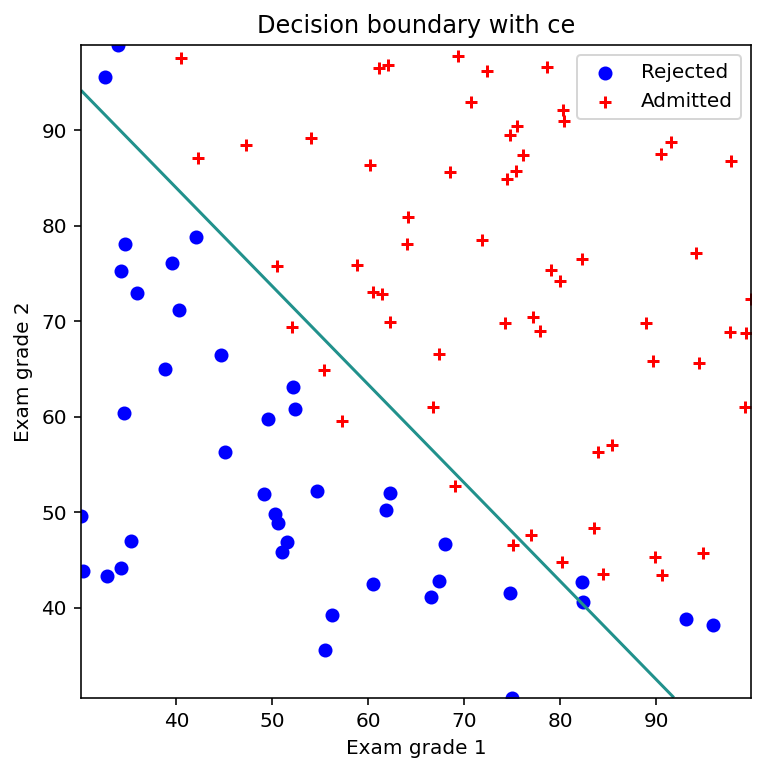

In [13]:
plt.figure(6,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.contour(xx1, xx2, p_ce, levels=1)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(loc=1)
plt.title('Decision boundary with ce')
plt.show()

## 7. Plot the decision boundary using the Scikit-learn logistic regression algorithm (2pt)

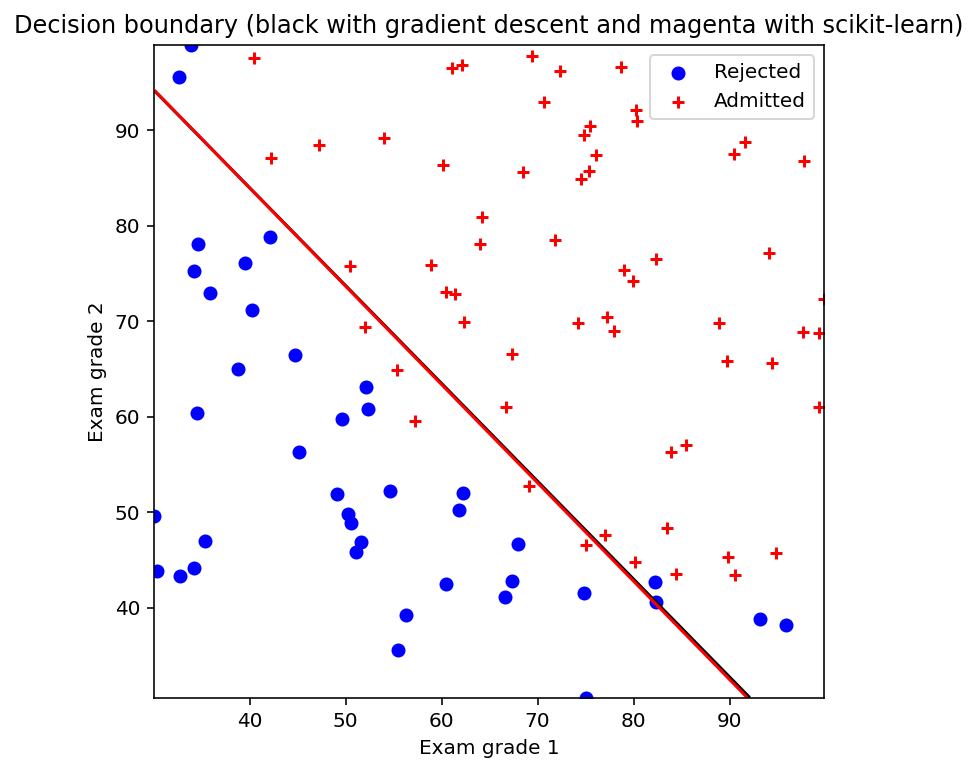

In [15]:
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_rejec], x2[idx_rejec], c='b', marker='o', label='Rejected') 
plt.scatter(x1[idx_admit], x2[idx_admit], c='r', marker='+', label='Admitted') 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.contour(xx1, xx2, p, levels=1, colors='black' );
plt.contour(xx1, xx2, p_ce, levels=1, colors='red');

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend(loc=1)
plt.show()

## 8. Plot the probability map using the mean square error (2pt)

## 9. Plot the probability map using the cross-entropy error (2pt)